In [271]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import erfinv, erf
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from scipy import stats
from scipy.special import gammaincinv
from matplotlib import cm


In [273]:
# Bimodal distribution

def bimodal_gauss(x, mu1, sigma1, mu2, sigma2):
    pdf = (1/(sigma1*np.sqrt(2*np.pi)))*np.exp(-(x-mu1)**2/(2*sigma1**2)) + (1/(sigma2*np.sqrt(2*np.pi)))*np.exp(-(x-mu2)**2/(2*sigma2**2))
    return pdf

def wilk_theorem_gauss(params, x):
    mu1, sigma1, mu2, sigma2, mu1_0, sigma1_0, mu2_0, sigma2_0 = params 

    pdf_H1 = (1/(sigma1*np.sqrt(2*np.pi)))*np.exp(-(x-mu1)**2/(2*sigma1**2)) + (1/(sigma2*np.sqrt(2*np.pi)))*np.exp(-(x-mu2)**2/(2*sigma2**2))
    pdf_H0 = (1/(sigma1_0*np.sqrt(2*np.pi)))*np.exp(-(x-mu1_0)**2/(2*sigma1_0**2)) + (1/(sigma2_0*np.sqrt(2*np.pi)))*np.exp(-(x-mu2_0)**2/(2*sigma2_0**2))
    
    # calculate  the likelihood ratio 
    # lam = -2 log (L(theta_ml|D)/ L(theta_0|D) = 2ln_H0 - 2ln_HA
    
    lnrt2_H1 =  2 * np.sum(np.log(pdf_H1))
    lnrt2_H0 =  2 * np.sum(np.log(pdf_H0))
    lam = lnrt2_H0 - lnrt2_H1
    return lam

In [275]:
np.random.seed(2147483648)


N1 = 100
mu_a1, sigma_a1 = 100, 5
mu_a2, sigma_a2 = 10, 40
X1_N1_a = np.random.normal(mu_a1, sigma_a1, N1)
X2_N1_a = np.random.normal(mu_a2, sigma_a2, N1)
X01_a = np.concatenate([X1_N1_a, X2_N1_a])

In [277]:
#H0
mu10 = 100
sig10 = 5
mu20 = 24.
sig20 = 40.

# H1
mu1 = 100.
sig1 = 5.
mu2 = 10.
sig2 = 40.

params = (mu1, sig1, mu2, sig2,  mu10, sig10, mu20, sig20)




In [279]:
# 95% CL 

dof_wilk = 2

alpha_95 = 5 # in percent
k = dof_wilk
x = alpha_95/100
isf_95 = 2 * gammaincinv(k/2, 1-x)

print("Degree of freedom: ", dof_wilk)
print(r"The value of chi-square at alpha = 95 % : ", isf_95)
print(r"The respective reduced chi-square value: ", isf_95/dof_wilk)


Degree of freedom:  2
The value of chi-square at alpha = 95 % :  5.991464547107979
The respective reduced chi-square value:  2.9957322735539895


In [281]:
# Make this more efficient by holding value only if bigger than prev value
log_likelihood_ratio = []
params = []
p_val_wilk = []
chosen_parameter = []
mu_X = []
mu_Y = []
P_val_XY = []
dof_wilk = 2


#mu1_range = np.linspace(80, 130.0, 100)
mu2_range = np.linspace(5., 50., 100)

parameter = [(mu1, sig1, m2 , sig2,  mu10, sig10, mu20, sig20) for m2 in mu2_range]   # mu_0 = 1.98, sig_0 = sig_
#parameter = [(m1, sig1, m2 , sig2,  mu10, sig10, mu20, sig20) for m1 in mu1_range for m2 in mu2_range]   # mu_0 = 1.98, sig_0 = sig_
#mu_range = [(m1, m2) for m1 in mu1_range for m2 in mu2_range]   # mu_0 = 1.98, sig_0 = sig_
#mu_range = np.array(mu_range)


for par in parameter:
    lrt2 = wilk_theorem_gauss(par, X01_a)
    log_likelihood_ratio.append(lrt2)
    p_value = 1 - stats.chi2.cdf(lrt2 , dof_wilk)
    p_value_percent = p_value * 100
    mu_X.append(par[0])
    mu_Y.append(par[2])
    P_val_XY.append(p_value)
    if p_value_percent > 5.0:
        chosen_parameter.append(par)
    p_val_wilk.append(p_value)

p_val_wilk = np.array(p_val_wilk)

idx = np.argwhere(np.diff(np.sign(log_likelihood_ratio - isf_95))).flatten()


#print("The -2 log likelihood ratio above zero: ", log_likelihood_ratio[log_likelihood_ratio > 0])

#print("The -2 log likelihood ratio above the critical values: ", log_likelihood_ratio[log_likelihood_ratio > isf_70])

Z = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Z = np.array(Z)
p_val_Z = 1. - stats.norm.cdf(Z)
#print(p_val_Z)

print("The index where -2 log likelihood ratio above the critical values: ", idx)
#print("The values of the parameters above at intersection: ", mu2_range[idx])

#print(mu_)

The index where -2 log likelihood ratio above the critical values:  [49]


In [283]:
p_val_wilk

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.31806843e-01, 6.49908910e-01,
       4.47926268e-01, 3.05060809e-01, 2.05300685e-01, 1.36526377e-01,
       8.97145452e-02, 5.82541755e-02, 3.73772017e-02, 2.36973338e-02,
       1.48457606e-02, 9.18994270e-03, 5.62117994e-03, 3.39737340e-03,
      

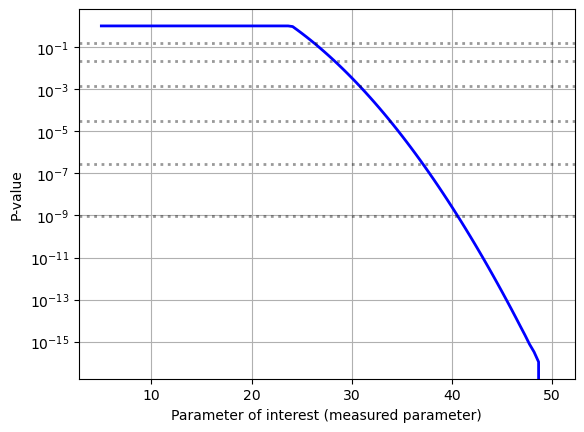

In [286]:
plt.plot(mu2_range, p_val_wilk, 'b',  linewidth=2, label=r'$\mathregular{-2 \ln(\Lambda)}$', alpha=1.0)
#plt.axhline(y = 0.05, color = 'r', linestyle = '--',  linewidth = 2) 
#plt.axhline(y = 1.0, color = 'r', linestyle = '--',  linewidth = 2, alpha = 0.4)
           
#plt.axhline(y = p_val_Z[0], color = 'black', linestyle = '--',  linewidth = 2, alpha = 0.4) 
plt.axhline(y = p_val_Z[1], color = 'black', linestyle = "dotted",  linewidth = 2, alpha = 0.4) 
plt.axhline(y = p_val_Z[2], color = 'black', linestyle = "dotted",  linewidth = 2, alpha = 0.4) 
plt.axhline(y = p_val_Z[3], color = 'black', linestyle = "dotted",  linewidth = 2, alpha = 0.4) 
plt.axhline(y = p_val_Z[4], color = 'black', linestyle = "dotted",  linewidth = 2, alpha = 0.4) 
plt.axhline(y = p_val_Z[5], color = 'black', linestyle = "dotted",  linewidth = 2, alpha = 0.4) 
plt.axhline(y = p_val_Z[6], color = 'black', linestyle = "dotted",  linewidth = 2, alpha = 0.4) 
#plt.axhline(y = p_val_Z[7], color = 'black', linestyle = "dashed",  linewidth = 2, alpha = 0.4)

plt.yscale('log')
plt.grid()
plt.xlabel("Parameter of interest (measured parameter)")
plt.ylabel("P-value")

# plt.text(3.12, 1.5e-01, r"$1 \sigma$")
# plt.text(3.12, 2.2e-02, r"$2 \sigma$")
# plt.text(3.12, 1.3e-03, r"$3 \sigma$")
# plt.text(3.12, 3.1e-05, r"$4 \sigma$")
# plt.text(3.12, 2.8e-07, r"$5 \sigma$")
# plt.text(3.12, 9.8e-10, r"$6 \sigma$")
# #plt.text(3.12, 1.5e-01, r"$7 \sigma$")

# plt.text(1.1, 1.81e-01, "15.87%")
# plt.text(1.1, 2.80e-02, "2.28%")
# plt.text(1.1, 1.60e-03, "0.13%")
# plt.text(1.1, 3.80e-05, "0.00%")
# plt.text(1.1, 3.6e-07, "0.00%")
# plt.text(1.1, 11.96e-10, "0.00%")


#plt.savefig("./Images/P_value_Bimodal.png",  bbox_inches='tight', dpi = 400)
plt.show()

In [210]:
chosen_parameter = np.array(chosen_parameter)

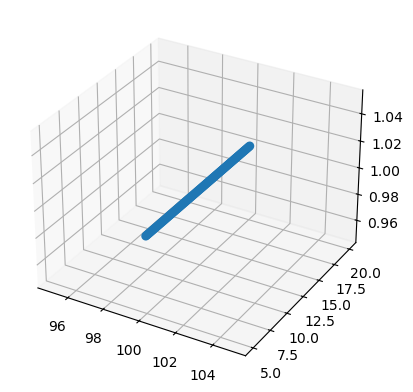

In [211]:
# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#ax.plot(xs, ys, zs)
#ax.plot(mu_X, mu_Y, P_val_XY, 'b',  linewidth=2, alpha=1.0)
ax.scatter(mu_X, mu_Y, P_val_XY, 'b',  linewidth=2, alpha=1.0)
#ax.plot_surface(mu_range[:,0], mu_range[:,1], p_val_wilk, vmin=p_val_wilk.min() * 2, cmap=cm.Blues)
#ax.set_zscale('log')
plt.show()

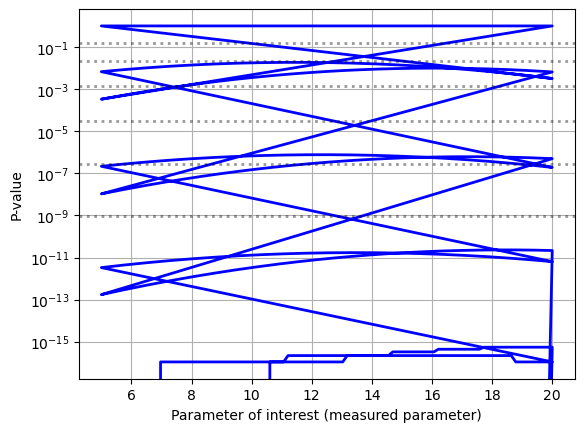

In [179]:
plt.plot(mu_Y, p_val_wilk, 'b',  linewidth=2, label=r'$\mathregular{-2 \ln(\Lambda)}$', alpha=1.0)
#plt.axhline(y = 0.05, color = 'r', linestyle = '--',  linewidth = 2) 
#plt.axhline(y = 1.0, color = 'r', linestyle = '--',  linewidth = 2, alpha = 0.4)
           
#plt.axhline(y = p_val_Z[0], color = 'black', linestyle = '--',  linewidth = 2, alpha = 0.4) 
plt.axhline(y = p_val_Z[1], color = 'black', linestyle = "dotted",  linewidth = 2, alpha = 0.4) 
plt.axhline(y = p_val_Z[2], color = 'black', linestyle = "dotted",  linewidth = 2, alpha = 0.4) 
plt.axhline(y = p_val_Z[3], color = 'black', linestyle = "dotted",  linewidth = 2, alpha = 0.4) 
plt.axhline(y = p_val_Z[4], color = 'black', linestyle = "dotted",  linewidth = 2, alpha = 0.4) 
plt.axhline(y = p_val_Z[5], color = 'black', linestyle = "dotted",  linewidth = 2, alpha = 0.4) 
plt.axhline(y = p_val_Z[6], color = 'black', linestyle = "dotted",  linewidth = 2, alpha = 0.4) 
#plt.axhline(y = p_val_Z[7], color = 'black', linestyle = "dashed",  linewidth = 2, alpha = 0.4)

plt.yscale('log')
plt.grid()
plt.xlabel("Parameter of interest (measured parameter)")
plt.ylabel("P-value")

# plt.text(3.12, 1.5e-01, r"$1 \sigma$")
# plt.text(3.12, 2.2e-02, r"$2 \sigma$")
# plt.text(3.12, 1.3e-03, r"$3 \sigma$")
# plt.text(3.12, 3.1e-05, r"$4 \sigma$")
# plt.text(3.12, 2.8e-07, r"$5 \sigma$")
# plt.text(3.12, 9.8e-10, r"$6 \sigma$")
# #plt.text(3.12, 1.5e-01, r"$7 \sigma$")

# plt.text(1.1, 1.81e-01, "15.87%")
# plt.text(1.1, 2.80e-02, "2.28%")
# plt.text(1.1, 1.60e-03, "0.13%")
# plt.text(1.1, 3.80e-05, "0.00%")
# plt.text(1.1, 3.6e-07, "0.00%")
# plt.text(1.1, 11.96e-10, "0.00%")


#plt.savefig("./Images/P_value_Bimodal.png",  bbox_inches='tight', dpi = 400)
plt.show()

## Plot the data

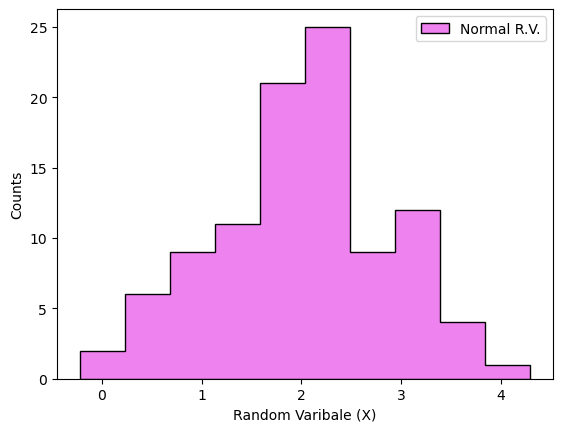

In [12]:
data_normal = pd.read_csv("/Users/kanha/BAM_kgupta/problem_with_least_square_fit/Data/normal_distribution.csv")

n_d = data_normal["X"]

# plot the normal
plt.hist(data_normal["X"], bins = 10,  density=False, histtype='stepfilled',color='violet', edgecolor='black', alpha=1.0, label="Normal R.V.")
plt.ylabel("Counts")
plt.xlabel("Random Varibale (X)")
plt.legend()
plt.savefig("/Users/kanha/BAM_kgupta/problem_with_least_square_fit/Results/Normal_distribution.png",  bbox_inches='tight', dpi=400)
plt.savefig("/Users/kanha/BAM_kgupta/problem_with_least_square_fit/Results/Normal_distribution.pdf",  bbox_inches='tight', dpi=400)
plt.show()


## The respective partial distribution function

In [14]:
def save(x):
    global P
    P.append(x)

def normal_pdf(X, mu, sigma):

    
    # Compute the negative log-likelihood
    pdf = 1.0/(np.sqrt(2*np.pi)*sigma)*np.exp(-(X - mu)**2/(2*sigma**2))
    
    return pdf

def normal_regression(params, X):
    # Unpack the model parameters
    
    mu, sigma = params
    
    # Compute the negative log-likelihood
    nll = - np.sum(np.log((1.0/(np.sqrt(2*np.pi)*sigma)*np.exp(-(X - mu)**2/(2*sigma**2)))))
    
    return nll

def wilk_theorem_gauss(params, X):
    mu_ml, sig_ml, mu_0, sig_0 = params

    # calculate  the likelihood ratio 
    # lam = -2 log (L(theta_ml|D)/ L(theta_0|D)
    n = len(X)
    sum_x = np.sum(X)
    lam = (-n * mu_ml**2 + n * mu_0**2 + 2 * mu_ml * sum_x - 2 * mu_0 * sum_x)/sig_ml**2 
    return lam

# Initial parameter values
initial_params = [1.3, 0.8]
initial_params = np.array(initial_params)

P = [ initial_params ]

# Perform maximum likelihood regression
result = minimize(normal_regression, initial_params, args=(n_d,), callback=save, options={"disp": True})

# Retrieve the estimated parameters
mu_, sig_ = result.x
covar_2 = result.hess_inv

mu_uncert = np.sqrt(covar_2[0][0])
sig_uncert = np.sqrt(covar_2[1][1])

print("mu :", mu_)
print("sigma :", sig_)



Optimization terminated successfully.
         Current function value: 127.583211
         Iterations: 11
         Function evaluations: 42
         Gradient evaluations: 14
mu : 2.008221287611712
sigma : 0.8666618293130349


In [15]:
P = np.array(P)
print(P)

[[1.3        0.8       ]
 [1.98573322 1.54153216]
 [2.32400429 1.3121744 ]
 [2.36944921 1.00856545]
 [2.21086397 0.86815832]
 [1.83805719 0.85649596]
 [1.89697909 0.87294615]
 [2.02422873 0.840855  ]
 [2.00603246 0.8713198 ]
 [2.00807106 0.86702125]
 [2.0082234  0.86665687]
 [2.00822129 0.86666183]]


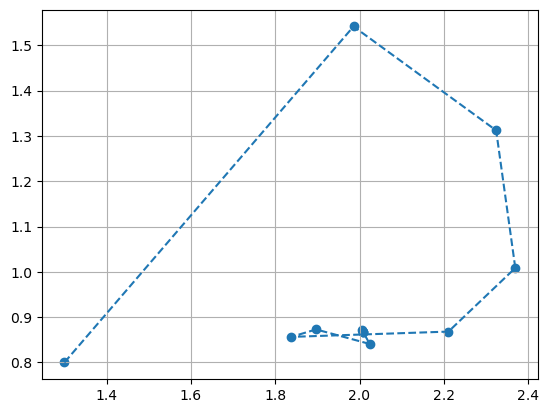

In [16]:
plt.plot(P[:,0], P[:,1], linestyle="--")
plt.scatter(P[:,0], P[:,1])
plt.grid()
plt.show()

In [17]:
#std_poi = np.sqrt(2*self.plr_res.hessian_poi_mle)
#poi_start =  self.plr_res.poi_mle - poi_range_n_sigma * std_poi 
#poi_stop = self.plr_res.poi_mle + poi_range_n_sigma * std_poi 
#poi_range = np.linspace(poi_start, poi_stop, poi_n_steps, endpoint=True)



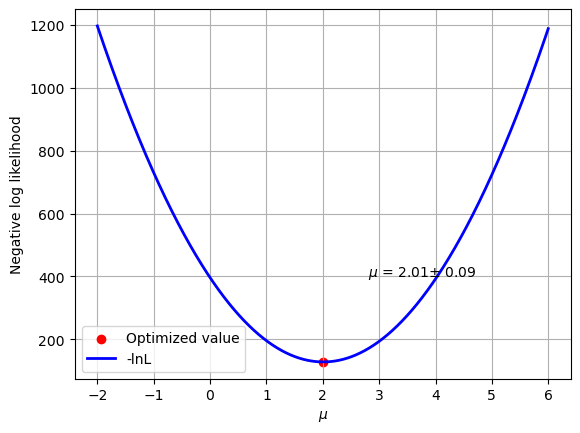

In [18]:
# Make this more efficient by holding value only if bigger than prev value
likelihood = []
params = []

mu_range = np.linspace(-2, 6., 1000)
parameter = [(m, sig_) for m in mu_range]

for par in parameter:
    likelihood.append(normal_regression(par, n_d))


#plt.plot(mu_range, likelihood, 'b', label="mu")
plt.scatter(mu_, min(likelihood), color = "red", label="Optimized value")
plt.plot(mu_range, likelihood, 'b',  linewidth=2, label="-lnL", alpha=1.0)
plt.xlabel(r'$\mu$')
plt.ylabel(r'Negative log likelihood')
plt.text(2.8, 400, r"$\mu$ = %.2f"%mu_+r"$\pm$ %.2f"%mu_uncert)
plt.grid()
plt.legend()
plt.savefig("/Users/kanha/BAM_kgupta/problem_with_least_square_fit/Results/LL_mu_normal.png",  bbox_inches='tight', dpi=400)
plt.savefig("/Users/kanha/BAM_kgupta/problem_with_least_square_fit/Results/LL_mu_normal.pdf",  bbox_inches='tight', dpi=400)
plt.show()

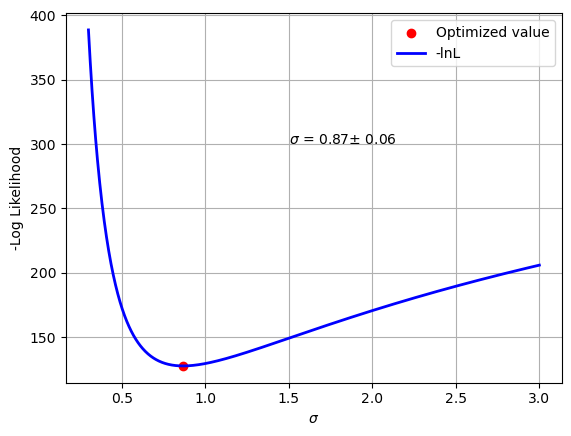

In [19]:
# Make this more efficient by holding value only if bigger than prev value
likelihood = []
params = []

sigma_range = np.linspace(0.3, 3.0, 1000)
parameter = [(mu_, sig) for sig in sigma_range]

for par in parameter:
    likelihood.append(normal_regression(par, n_d))

plt.scatter(sig_, min(likelihood), color = "red", label="Optimized value")
plt.plot(sigma_range, likelihood, 'b', linewidth=2, label="-lnL", alpha=1.0)
plt.xlabel(r'$\sigma$')
plt.ylabel(r'-Log Likelihood')
plt.text(1.5, 300, r"$\sigma$ = %.2f"%sig_+r"$\pm$ %.2f"%sig_uncert)
plt.grid()
plt.legend()
plt.savefig("/Users/kanha/BAM_kgupta/problem_with_least_square_fit/Results/LL_sig_normal.png",  bbox_inches='tight', dpi=400)
plt.savefig("/Users/kanha/BAM_kgupta/problem_with_least_square_fit/Results/LL_sig_normal.pdf",  bbox_inches='tight', dpi=400)
plt.show()

In [20]:
# Log likelihood ratio

mu0 = 1.8
params0 = mu0, sig_
params1 = mu_, sig_

#param_wilk = params1, params0
param_wilk = mu_, sig_, mu0, sig_

lrt2 = wilk_theorem_gauss(param_wilk, n_d)

ki_sqr = lrt2

dof_wilk = 1
p_value = 1 - stats.chi2.cdf(lrt2 , dof_wilk)
p_value_percent = p_value * 100

# print(nll0)
# print(nll1)

print("Chi-square Value: ", lrt2)
print("Degree of freedom: ", dof_wilk)
print("Chi-Square / dof :", lrt2/dof_wilk)
print("Chi Square-test: p value = %.2f"%p_value_percent+"%")


# 95% CL 

alpha_95 = 5 # in percent
k = dof_wilk
x = alpha_95/100
isf_95 = 2 * gammaincinv(k/2, 1-x)

print("Degree of freedom: ", dof_wilk)
print(r"The value of chi-square at alpha = 95 % : ", isf_95)
print(r"The respective reduced chi-square value: ", isf_95/dof_wilk)



# Make this more efficient by holding value only if bigger than prev value
log_likelihood_ratio = []
params = []
p_val_wilk = []
dof_wilk = 1

mu_min = mu_ - mu_uncert * sig_
mu_max = mu_ + mu_uncert * sig_
mu_range = np.linspace(1.0, 3.0, 1000)
#mu_range = np.linspace(1.528, 2.485, 1000)
#mu_range = np.linspace(mu_min, mu_max, 1000)
parameter = [(m, sig_, mu0, sig_) for m in mu_range]   # mu_0 = 1.98, sig_0 = sig_

for par in parameter:
    lrt2 = wilk_theorem_gauss(par, n_d)
    log_likelihood_ratio.append(lrt2)
    p_value = 1 - stats.chi2.cdf(lrt2 , dof_wilk)
    p_value_percent = p_value * 100
    p_val_wilk.append(p_value)

p_val_wilk = np.array(p_val_wilk)

idx = np.argwhere(np.diff(np.sign(log_likelihood_ratio - isf_95))).flatten()


#print("The -2 log likelihood ratio above zero: ", log_likelihood_ratio[log_likelihood_ratio > 0])

#print("The -2 log likelihood ratio above the critical values: ", log_likelihood_ratio[log_likelihood_ratio > isf_70])

Z = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Z = np.array(Z)
p_val_Z = 1. - stats.norm.cdf(Z)
#print(p_val_Z)

print("The index where -2 log likelihood ratio above the critical values: ", idx)
print("The values of the parameters above at intersection: ", mu_range[idx])

print(mu_)

Chi-square Value:  5.772327288285545
Degree of freedom:  1
Chi-Square / dof : 5.772327288285545
Chi Square-test: p value = 1.63%
Degree of freedom:  1
The value of chi-square at alpha = 95 % :  3.841458820694124
The respective reduced chi-square value:  3.841458820694124
The index where -2 log likelihood ratio above the critical values:  [443 563]
The values of the parameters above at intersection:  [1.88688689 2.12712713]
2.008221287611712


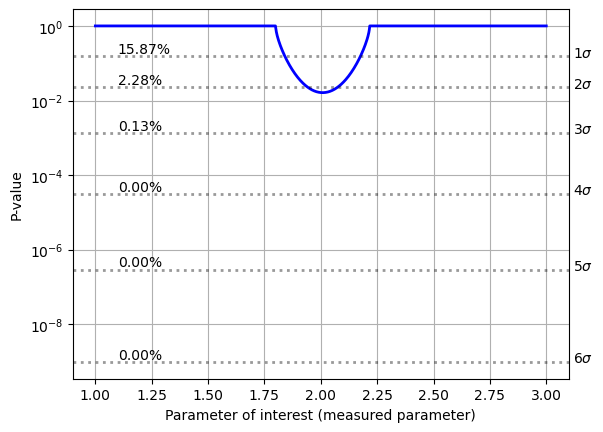

In [21]:
plt.plot(mu_range, p_val_wilk, 'b',  linewidth=2, label=r'$\mathregular{-2 \ln(\Lambda)}$', alpha=1.0)
#plt.axhline(y = 0.05, color = 'r', linestyle = '--',  linewidth = 2) 
#plt.axhline(y = 1.0, color = 'r', linestyle = '--',  linewidth = 2, alpha = 0.4)
           
#plt.axhline(y = p_val_Z[0], color = 'black', linestyle = '--',  linewidth = 2, alpha = 0.4) 
plt.axhline(y = p_val_Z[1], color = 'black', linestyle = "dotted",  linewidth = 2, alpha = 0.4) 
plt.axhline(y = p_val_Z[2], color = 'black', linestyle = "dotted",  linewidth = 2, alpha = 0.4) 
plt.axhline(y = p_val_Z[3], color = 'black', linestyle = "dotted",  linewidth = 2, alpha = 0.4) 
plt.axhline(y = p_val_Z[4], color = 'black', linestyle = "dotted",  linewidth = 2, alpha = 0.4) 
plt.axhline(y = p_val_Z[5], color = 'black', linestyle = "dotted",  linewidth = 2, alpha = 0.4) 
plt.axhline(y = p_val_Z[6], color = 'black', linestyle = "dotted",  linewidth = 2, alpha = 0.4) 
#plt.axhline(y = p_val_Z[7], color = 'black', linestyle = "dashed",  linewidth = 2, alpha = 0.4)

plt.yscale('log')
plt.grid()
plt.xlabel("Parameter of interest (measured parameter)")
plt.ylabel("P-value")

plt.text(3.12, 1.5e-01, r"$1 \sigma$")
plt.text(3.12, 2.2e-02, r"$2 \sigma$")
plt.text(3.12, 1.3e-03, r"$3 \sigma$")
plt.text(3.12, 3.1e-05, r"$4 \sigma$")
plt.text(3.12, 2.8e-07, r"$5 \sigma$")
plt.text(3.12, 9.8e-10, r"$6 \sigma$")
#plt.text(3.12, 1.5e-01, r"$7 \sigma$")

plt.text(1.1, 1.81e-01, "15.87%")
plt.text(1.1, 2.80e-02, "2.28%")
plt.text(1.1, 1.60e-03, "0.13%")
plt.text(1.1, 3.80e-05, "0.00%")
plt.text(1.1, 3.6e-07, "0.00%")
plt.text(1.1, 11.96e-10, "0.00%")


plt.savefig("./Images/P_value_sigma_B.png",  bbox_inches='tight', dpi=1400)
plt.show()

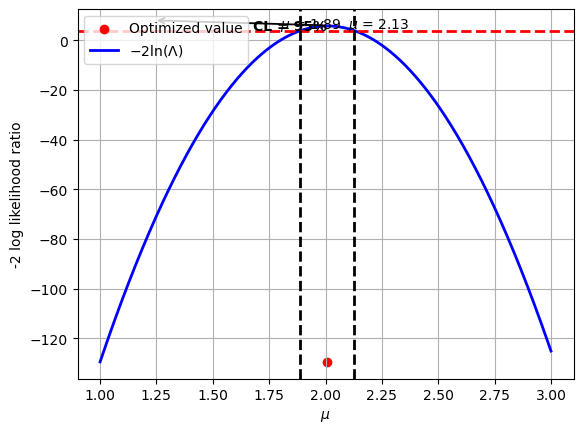

In [22]:


#plt.plot(mu_range, likelihood, 'b', label="mu")
plt.scatter(mu_, min(log_likelihood_ratio), color = "red", label="Optimized value")
plt.plot(mu_range, log_likelihood_ratio, 'b',  linewidth=2, label=r'$\mathregular{-2 \ln(\Lambda)}$', alpha=1.0)
#plt.plot(mu_range[idx], log_likelihood_ratio[idx], '--', color='k', lw=2)
#plt.scatter(mu_range[idx], log_likelihood_ratio[idx], color = "black")
plt.axhline(y = isf_95, color = 'r', linestyle = '--',  linewidth = 2) 
plt.axvline(x = mu_range[idx][0], color = 'k', linestyle = '--',  linewidth=2)
plt.axvline(x = mu_range[idx][1], color = 'k', linestyle = '--',  linewidth=2)
plt.xlabel(r'$\mu$')
plt.ylabel('-2 log likelihood ratio')
#plt.ylabel('$-2ln(L_{0}/L_{1}) = \chi^{2}$')
#plt.ylabel(r'$\mathregular{-2 \ln(\Lambda)}$', fontsize=10)
#plt.text(5.1, -3800, r"$\lambda$ (optimized) = %.2f"%mu_+"$\pm$ %.2f"%mu_uncert)
plt.text(1.68, isf_95 + 0.4, r"CL = 95%", weight="bold")
#plt.text(-2.1, isf_90, r"CL = 90%", weight="bold")
plt.text(1.8, 5, r"$\mu$ = %.2f"%mu_range[idx][0])
plt.text(2.1, 5, r"$\mu$ = %.2f"%mu_range[idx][1])
plt.annotate("", xy=(1.24, 8), xytext=(2, 6),
            arrowprops=dict(facecolor='black', lw=1.3, arrowstyle="->"))
plt.annotate("", xy=(4.6, 8), xytext=(5.3, 6),
            arrowprops=dict(facecolor='black', lw=1.3, arrowstyle="->"))
plt.grid()
plt.legend()
plt.savefig("/Users/kanha/BAM_kgupta/problem_with_least_square_fit/Results/normal_CL_20.png",  bbox_inches='tight', dpi=400)
plt.savefig("/Users/kanha/BAM_kgupta/problem_with_least_square_fit/Results/normal_CL_20.pdf",  bbox_inches='tight', dpi=400)
plt.show()



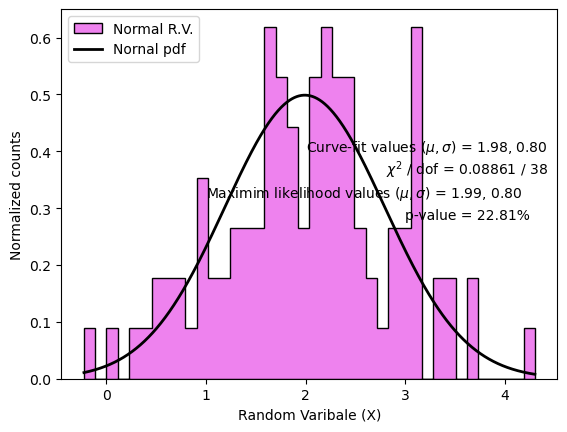

In [23]:
x_values = np.linspace(min(data_normal["X"]), max(data_normal["X"]), 10000)
mu_fit = 1.99
sig_fit =0.80
y_values = normal_pdf(x_values, mu_fit, sig_fit)

#print(y_values)
plt.hist(data_normal["X"], bins = 40,  density=True, histtype='stepfilled',color='violet', edgecolor='black', alpha=1.0, label="Normal R.V.")
plt.plot(x_values, y_values, color='black', linewidth=2, alpha=1.0, label="Nornal pdf")
plt.ylabel("Normalized counts")
plt.xlabel("Random Varibale (X)")
#plt.xlim(0,70)
plt.legend()
plt.text(2.0, 0.4, r"Curve-fit values ($\mu, \sigma$) = %.2f"%1.98+", %.2f"%0.80)
plt.text(2.8, 0.36, r"$\chi^{2}$ / dof = %.5f"%0.08861+" / %0.0f"%38)
plt.text(1.0, 0.32, r"Maximim likelihood values ($\mu, \sigma$) = %.2f"%1.99+", %.2f"%0.80)
plt.text(3.0, 0.28, r"p-value = %.2f"%22.81+"%")
plt.savefig("/Users/kanha/BAM_kgupta/problem_with_least_square_fit/Results/normal_distribution_data_pdf.png",  bbox_inches='tight', dpi=400)
plt.savefig("/Users/kanha/BAM_kgupta/problem_with_least_square_fit/Results/normal_distribution_data_pdf.pdf",  bbox_inches='tight', dpi=400)
plt.show()